In [10]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline

### Генерация данных

In [11]:
a = scipy.stats.multivariate_normal.rvs(size=150, mean=[0, 3], cov=[[2, 1.5], [1.5, 2]])
b = scipy.stats.multivariate_normal.rvs(size=200, mean=[2.5, 0], cov=[[2, -0.5], [-0.5, 2]])
X_train = np.vstack([a, b])
y_train = np.hstack([np.zeros(len(a)), np.ones(len(b))])
print(X_train.shape, y_train.shape)

(350, 2) (350,)


Визуализация данных:

In [ ]:
#здесь надо написать код для визуализации сгенерированных данных
#подсказка: plt.scatter может помочь

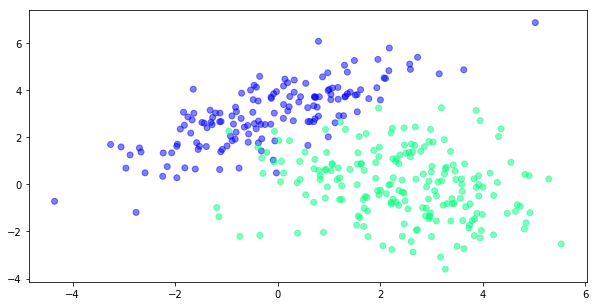

In [12]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.5, cmap='winter')
plt.show()

Аналогично генерируем данные для тестирования. Сделаем тестовую выборку в два раза больше, чем обучающую:

In [4]:
#здесь код для генерации X_test и y_test

In [14]:
a = scipy.stats.multivariate_normal.rvs(size=2 * 150, mean=[0, 3], cov=[[2, 1.5], [1.5, 2]])
b = scipy.stats.multivariate_normal.rvs(size=2 * 200, mean=[2.5, 0.5], cov=[[2, -0.5], [-0.5, 2]])
X_test = np.vstack([a, b])
y_test = np.hstack([np.zeros(len(a)), np.ones(len(b))])
print(X_test.shape, y_test.shape)

(700, 2) (700,)


In [ ]:
#здесь код для визуализации тестовой выборки

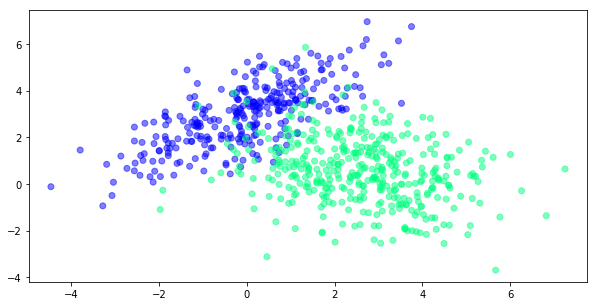

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.5, cmap='winter')
plt.xlim((min(X_test[:, 0]) - 0.5, max(X_test[:, 0]) + 0.5))
plt.ylim((min(X_test[:, 1]) - 0.5, max(X_test[:, 1]) + 0.5))
plt.show()

### Обучение модели

<a href=http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html>Документация</a>

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn.metrics import accuracy_score

zero_one_loss - доля неправильно классифицированных объектов из выборки

accuracy_score - доля правильно классифицированных объектов

Обучение модели (KNN):

In [17]:
model = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
model.fit(X_train, y_train)
print(model)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


Считаем ошибку на обучении и на тесте

In [21]:
#код для подсчет ошибки на обучении
print(accuracy_score(model.predict(X_train), y_train))

0.968571428571


In [19]:
#код для подсчет ошибки на тесте
print(accuracy_score(model.predict(X_test), y_test))

0.928571428571


Качество на тесте

In [12]:
#код для подсчета качества на тесте (с помощью метрики accuracy)

### Визуализация

In [13]:
def generate_grid(train_sample, border=1, step=0.05):
    return np.meshgrid(np.arange(min(train_sample[:, 0]) - border, max(train_sample[:, 1]) + border, step), 
                       np.arange(min(train_sample[:, 1]) - border, max(train_sample[:, 1]) + border, step))

In [20]:
def create_picture(X_train, y_train, model, border=1, step=0.05, figsize=(18, 5), cmap='winter', alpha=1):
    
    # Создание сетки
    grid = generate_grid(X_train, border, step)
    grid_ravel = np.c_[grid[0].ravel(), grid[1].ravel(0)]  # Выворачивание сетки
    
    # Предсказание значений для сетки
    grid_predicted_ravel = model.predict_proba(grid_ravel)[:, 1]  # Берем вероятности для первого класса
    grid_predicted = grid_predicted_ravel.reshape(grid[0].shape)  # Подгоняем размер
    
    
    # Построение фигуры
    plt.figure(figsize=figsize)
    
    plt.subplot(1, 2, 1)
    plt.pcolormesh(grid[0], grid[1], grid_predicted > 0.5, cmap=cmap)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=alpha, cmap=cmap)
    plt.xlim((min(grid_ravel[:, 0]), max(grid_ravel[:, 0])))
    plt.ylim((min(grid_ravel[:, 1]), max(grid_ravel[:, 1])))
    plt.title(u'Classification {}-NN'.format(model.get_params()['n_neighbors']))
    
    plt.show()
    
    
    # Удаление лишних данных
    del(grid)
    del(grid_ravel)
    del(grid_predicted_ravel)
    del(grid_predicted)

Визуализация для k=5:

/Users/yanina-n/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


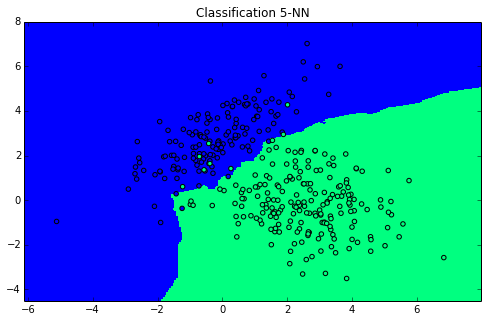

In [21]:
create_picture(X_train, y_train, KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train))

### Подбор параметра

Нарисовать результат работы классификатора для k=1,3,10,50,100:

/Users/yanina-n/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


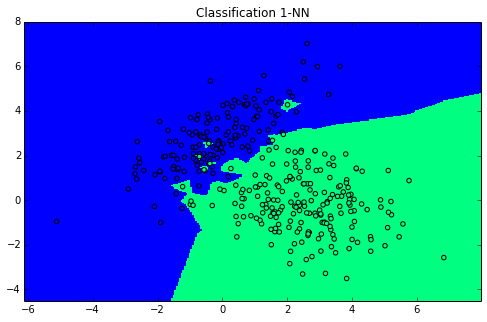

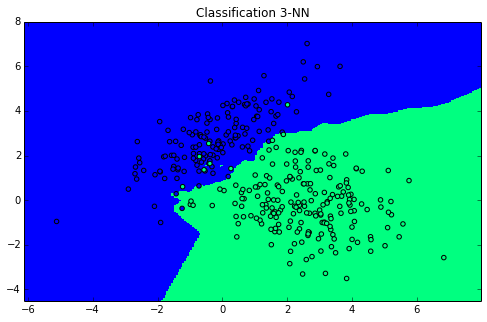

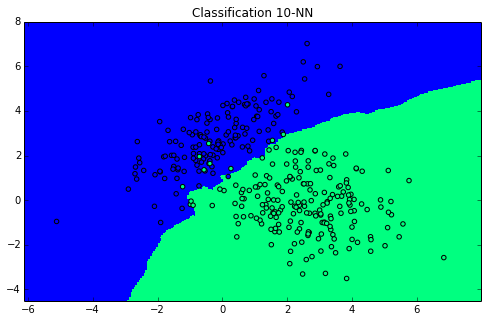

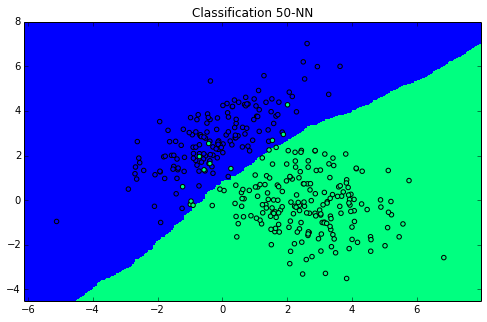

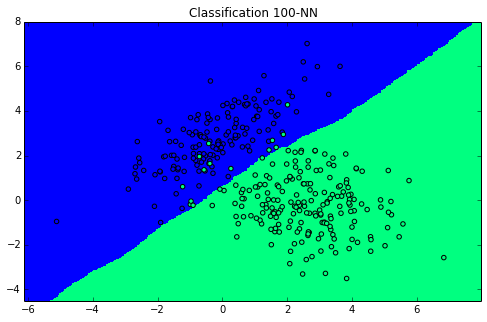

In [22]:
for n_neighbors in [1, 3, 10, 50, 100]:
    create_picture(X_train, y_train, KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train))

Считаем accuracy для моделей с разным количеством соседей:

In [13]:
scores = [accuracy_score(y_test, KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train).predict(X_test)) 
          for n in range(1, 201)]

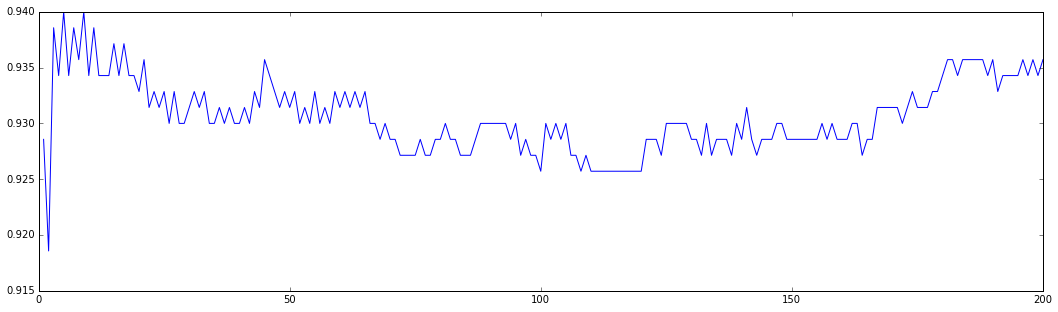

In [14]:
plt.figure(figsize=(18, 5))
plt.plot(range(1, 201), scores)
plt.show()

## Кросс-валидация

In [23]:
from sklearn.grid_search import GridSearchCV

In [24]:
params = {'n_neighbors': range(1, 201)}
grid_searcher = GridSearchCV(KNeighborsClassifier(), params, cv=20, n_jobs=4)
grid_searcher.fit(X_train, y_train)

means = np.array([iteration.mean_validation_score for iteration in grid_searcher.grid_scores_])
stds = np.array([np.std(iteration.cv_validation_scores) for iteration in grid_searcher.grid_scores_])

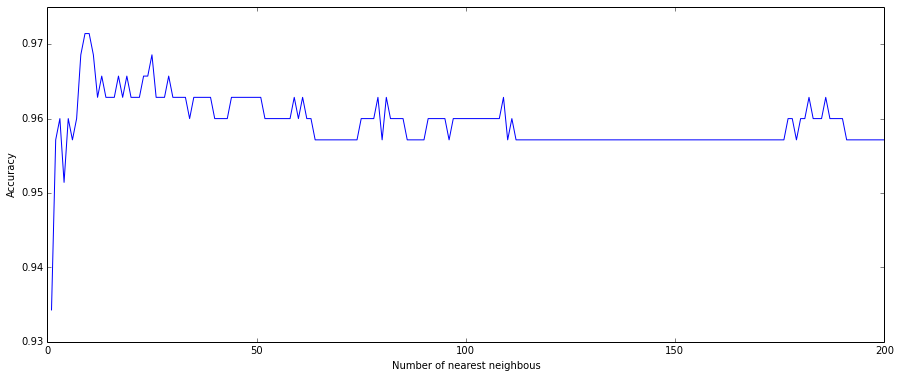

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(range(1, 201), means)
plt.xlabel('Number of nearest neighbous')
plt.ylabel('Accuracy')
plt.show()

In [23]:
a = scipy.stats.multivariate_normal.rvs(size=1000, mean=[0, 3], cov=[[2, 1.5], [1.5, 2]])
b = scipy.stats.multivariate_normal.rvs(size=1500, mean=[2.5, 0.5], cov=[[2, -0.5], [-0.5, 2]])
X_train = np.vstack([a, b])
y_train = np.hstack([np.zeros(len(a)), np.ones(len(b))])
print X_train.shape, y_train.shape

(2500, 2) (2500,)


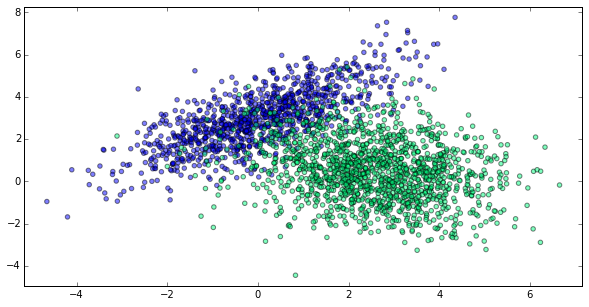

In [24]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.5, cmap='winter')
plt.xlim((min(X_train[:, 0]) - 0.5, max(X_train[:, 0]) + 0.5))
plt.ylim((min(X_train[:, 1]) - 0.5, max(X_train[:, 1]) + 0.5))
plt.show()

In [26]:
params = {'n_neighbors': range(1, 201)}
grid_searcher = GridSearchCV(KNeighborsClassifier(), params, cv=30, n_jobs=4)
grid_searcher.fit(X_train, y_train)

means = np.array([iteration.mean_validation_score for iteration in grid_searcher.grid_scores_])
stds = np.array([np.std(iteration.cv_validation_scores) for iteration in grid_searcher.grid_scores_])

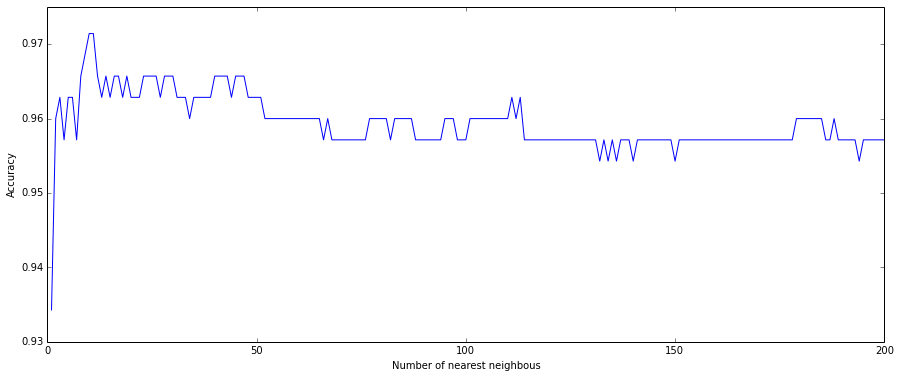

In [27]:
plt.figure(figsize=(15, 6))
plt.plot(range(1, 201), means)
plt.xlabel('Number of nearest neighbous')
plt.ylabel('Accuracy')
plt.show()

# Какие параметры еще можно настраивать?

Помимо числа соседей, мы можем подбирать следующие параметры:

1. weights ('uniform', 'distance', [callable])
2. algorithm ('auto', 'ball_tree', 'kd_tree', 'brute')
3. metric
4. Другие параметры: leaf_size (для BallTree и KDTree), p (для метрики Минковского), ...

# Обучим KNN на датасете Wine

In [25]:
import pandas as pd

data = pd.read_csv('wine_data.csv', header=None)
print(data.shape)
data.head()

(178, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [27]:
y = data[0].as_matrix()
X = data.drop(0, axis=1).as_matrix()
print(X.shape, y.shape)

(178, 13) (178,)


Подберем число соседей по кросс-валидации:

In [33]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

def cv_nn(n_neighbors, X, y):
    average_scores = []
    cv = KFold(X.shape[0], n_folds=5, shuffle=True, random_state=42)
    for k in n_neighbors:
        #обучить KNN и посчитать score
        knn_clf = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn_clf, X, y, cv=cv)
        average_scores.append(scores.mean())
    return average_scores

In [34]:
n_neighbors = range(1, 51)
average_scores = cv_nn(n_neighbors, X, y)

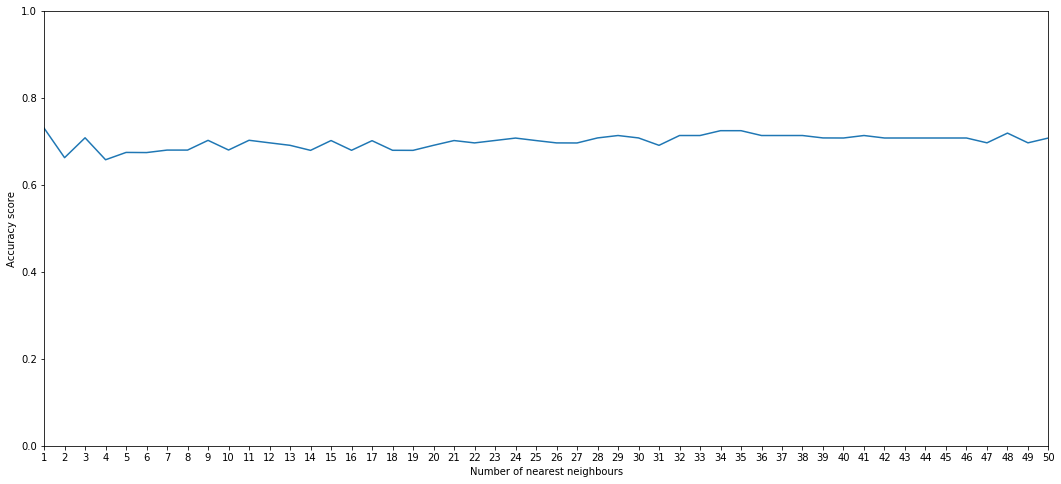

In [35]:
plt.figure(figsize=(18, 8))
l1 = plt.plot(n_neighbors, average_scores)
plt.xticks(n_neighbors)
plt.xlim(np.min(n_neighbors), np.max(n_neighbors))
plt.ylim(0, 1)
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Accuracy score')